## Load Modules

In [63]:
using MLJ
using MultivariateStats
using ScikitLearn
using Plots
using CSV
using DataFrames
using StatsBase
using Clustering: randindex, silhouettes, varinfo, vmeasure, mutualinfo
using LinearAlgebra: diag

In [2]:
ENV["LINES"] = 100;

In [53]:
RNG = 1254;

## Import Data and Set Up

In [4]:
data = CSV.read("biodegradation.csv")
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,1,4.78264,2.0,4.828,6.496,,,Float64
2,2,3.06951,0.8039,3.0463,9.1775,,,Float64
3,3,0.716588,0,0.0,12,,,Int64
4,4,0.042654,0,0.0,3,,,Int64
5,5,0.980095,0,0.0,36,,,Int64
6,6,0.290047,0,0.0,13,,,Int64
7,7,1.64645,0,1.0,18,,,Int64
8,8,37.0556,0.0,37.5,60.7,,,Float64
9,9,1.3763,0,1.0,24,,,Int64


In [5]:
label_counts = countmap(data[:(Class)])
collect(label_counts[i] / size(data)[1] for i in keys(label_counts))

2-element Array{Float64,1}:
 0.33744075829383885
 0.6625592417061611

In [6]:
coerce!(data, :Class=>Multiclass)
schema(data)

┌─────────┬─────────────────────────────────┬───────────────┐
│ _.names │ _.types                         │ _.scitypes    │
├─────────┼─────────────────────────────────┼───────────────┤
│ 1       │ Float64                         │ Continuous    │
│ 2       │ Float64                         │ Continuous    │
│ 3       │ Int64                           │ Count         │
│ 4       │ Int64                           │ Count         │
│ 5       │ Int64                           │ Count         │
│ 6       │ Int64                           │ Count         │
│ 7       │ Int64                           │ Count         │
│ 8       │ Float64                         │ Continuous    │
│ 9       │ Int64                           │ Count         │
│ 10      │ Int64                           │ Count         │
│ 11      │ Int64                           │ Count         │
│ 12      │ Float64                         │ Continuous    │
│ 13      │ Float64                         │ Continuous    │
│ 14    

In [7]:
y, X = unpack(data, ==(:Class), colname->true)
train, test = partition(eachindex(y), 0.7, shuffle=true, rng=123, stratify=values(data[:Class])) # gives 70:30 split

([465, 562, 278, 619, 161, 972, 782, 321, 537, 760  …  12, 913, 471, 13, 1006, 802, 112, 840, 744, 261], [196, 586, 245, 77, 1028, 432, 215, 987, 137, 411  …  975, 610, 886, 848, 731, 1024, 805, 500, 659, 415])

#### Confirming that data was stratified correctly

In [8]:
train_counts = countmap(data[train,:Class])
collect(train_counts[i] / size(train)[1] for i in keys(train_counts))

2-element Array{Float64,1}:
 0.33739837398373984
 0.6626016260162602

In [9]:
test_counts = countmap(data[test,:Class])
collect(test_counts[i] / size(test)[1] for i in keys(test_counts))

2-element Array{Float64,1}:
 0.33753943217665616
 0.6624605678233438

#### Standardizing data pre-clustering

In [10]:
standardizer = Standardizer()
stand = machine(standardizer, X[train,:]) #only want to standardize on training distribution
MLJ.fit!(stand)
X_stand = MLJ.transform(stand, X);

┌ Info: Training Machine{Standardizer} @517.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319


## Set up model

In [11]:
task(model) = !model.is_supervised
models(task)

32-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AffinityPropagation, package_name = ScikitLearn, ... )
 (name = AgglomerativeClustering, package_name = ScikitLearn, ... )
 (name = Birch, package_name = ScikitLearn, ... )
 (name = ContinuousEncoder, package_name = MLJModels, ... )
 (name = DBSCAN, package_name = ScikitLearn, ... )
 (name = FactorAnalysis, package_name = MultivariateStats, ... )
 (name = FeatureAgglomeration, package_name = ScikitLearn, ... )
 (name = FeatureSelector, package_name = MLJModels, ... )
 (name = FillImputer, package_name = MLJModels, ... )
 (name = ICA, package_name = MultivariateStats, ... )
 (name = KMeans, package_name 

# Clustering Algorithms
Run the clustering algorithms on the datasets and describe what you see.

### KMeans

In [48]:
@load KMeans pkg=ParallelKMeans
# @load KMeans pkg=Clustering

KMeans(
    algo = ParallelKMeans.Hamerly(),
    k_init = "k-means++",
    k = 3,
    tol = 1.0e-6,
    max_iters = 300,
    copy = true,
    threads = 4,
    rng = Random._GLOBAL_RNG(),
    weights = nothing,
    init = nothing) @376

In [64]:
function dist_mat(X::Matrix)
    G = X * X'
    dG = diag(G)
    return sqrt.(dG .+ dG' .- 2 .* G)
end


dist_mat (generic function with 2 methods)

In [76]:
k_range = 2:15
total_costs = []
sils = []

for i in k_range
    println("K = $i")
    model = ParallelKMeans.KMeans(k=i, rng=RNG)
    mach = machine(model, X_stand[train,:]) |> MLJ.fit!
#     @show report(mach) 
#     @show fitted_params(mach)
    @show mach.report.totalcost # https://github.com/PyDataBlog/ParallelKMeans.jl/blob/87ce07d10796078aacffcbea0b2e9dc0c02f25d7/src/hamerly.jl#L65
    @show countmap(mach.report.assignments)
    s = silhouettes(mach.report.assignments, dist_mat(convert(Matrix,X_stand[train,:])))
    @show mean(s)
    push!(total_costs, mach.report.totalcost) 
    push!(sils, mean(s))
    println("")
end

K = 2
Iteration 1: Jclust = 92748.47164378107
Iteration 2: Jclust = 137408.19675856002
Iteration 3: Jclust = 137408.19675856002
Successfully terminated with convergence.
mach.report.totalcost = 85155.820929728
countmap(mach.report.assignments) = Dict(2 => 6,1 => 732)
mean(s) = 0.5576929246829723

K = 3
Iteration 1: Jclust = 67760.63418224893


┌ Warning: The scitype of `X`, in `machine(model, X)` is incompatible with `model=KMeans @328`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s45"} where var"#s45"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:116
┌ Info: Training Machine{KMeans} @269.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Warning: The scitype of `X`, in `machine(model, X)` is incompatible with `model=KMeans @525`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s45"} where var"#s45"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:116
┌ Info: Training Machine{KMeans} @040.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319


Iteration 2: Jclust = 111571.00890938425
Iteration 3: Jclust = 111571.00890938425
Successfully terminated with convergence.
mach.report.totalcost = 60530.081144863965
countmap(mach.report.assignments) = Dict(2 => 6,3 => 1,1 => 731)
mean(s) = 0.56527581509701

K = 4
Iteration 1: Jclust = 59593.59536523831
Iteration 2: Jclust = 80216.10976826624
Iteration 3: Jclust = 74184.43120229282
Iteration 4: Jclust = 66311.02258210859
Iteration 5: Jclust = 56177.95984568506
Iteration 6: Jclust = 53803.23842492724
Iteration 7: Jclust = 53266.43227964181
Iteration 8: Jclust = 52794.50688336391
Iteration 9: Jclust = 54493.66136561509
Iteration 10: Jclust = 52822.3763657402
Iteration 11: Jclust = 53651.013492818274
Iteration 12: Jclust = 53847.247114172664
Iteration 13: Jclust = 54177.430557969754
Iteration 14: Jclust = 54177.430557969754
Successfully terminated with convergence.
mach.report.totalcost = 47336.7263057391
countmap(mach.report.assignments) = Dict(4 => 178,2 => 6,3 => 1,1 => 553)
mean(s) =

┌ Warning: The scitype of `X`, in `machine(model, X)` is incompatible with `model=KMeans @212`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s45"} where var"#s45"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:116
┌ Info: Training Machine{KMeans} @903.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Warning: The scitype of `X`, in `machine(model, X)` is incompatible with `model=KMeans @122`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s45"} where var"#s45"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:116
┌ Info: Training Machine{KMeans} @419.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Warning: The scitype of `X`, in 

mean(s) = 0.1890810793273911

K = 10
Iteration 1: Jclust = 42549.55079055577
Iteration 2: Jclust = 34277.69038033911
Iteration 3: Jclust = 34865.98375247782
Iteration 4: Jclust = 32697.97155529706
Iteration 5: Jclust = 32970.54920102257
Iteration 6: Jclust = 33282.01026240479
Iteration 7: Jclust = 33054.053282795896
Iteration 8: Jclust = 32404.57090319886
Iteration 9: Jclust = 32432.925684978276
Iteration 10: Jclust = 32147.91505217785
Iteration 11: Jclust = 32024.444213896815
Iteration 12: Jclust = 31368.12566266452
Iteration 13: Jclust = 30936.153311308808
Iteration 14: Jclust = 30987.95611136076
Iteration 15: Jclust = 31194.26876034567
Iteration 16: Jclust = 30390.7254333498
Iteration 17: Jclust = 29859.258869644225
Iteration 18: Jclust = 30451.820919494996
Iteration 19: Jclust = 29783.119156427012
Iteration 20: Jclust = 30125.48348574591
Iteration 21: Jclust = 30269.728330501886
Iteration 22: Jclust = 30269.728330501886
Successfully terminated with convergence.
mach.report.totalcos

┌ Warning: The scitype of `X`, in `machine(model, X)` is incompatible with `model=KMeans @979`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s45"} where var"#s45"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:116
┌ Info: Training Machine{KMeans} @658.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Warning: The scitype of `X`, in `machine(model, X)` is incompatible with `model=KMeans @130`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s45"} where var"#s45"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:116
┌ Info: Training Machine{KMeans} @543.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Warning: The scitype of `X`, in 

mean(s) = 0.14476616766102005

K = 15
Iteration 1: Jclust = 37294.84810550567
Iteration 2: Jclust = 26616.74656666285
Iteration 3: Jclust = 26873.35832461617
Iteration 4: Jclust = 25921.67940245383
Iteration 5: Jclust = 26343.72508910541
Iteration 6: Jclust = 26483.637605373187
Iteration 7: Jclust = 25947.880494363628
Iteration 8: Jclust = 25620.855617508867
Iteration 9: Jclust = 25493.891665740382
Iteration 10: Jclust = 25655.954129011283
Iteration 11: Jclust = 25704.627857599313
Iteration 12: Jclust = 25836.166248650465
Iteration 13: Jclust = 25362.84817156288
Iteration 14: Jclust = 25331.360744741538
Iteration 15: Jclust = 24988.04157101894
Iteration 16: Jclust = 25418.0251973197
Iteration 17: Jclust = 25572.94467956421
Iteration 18: Jclust = 24931.731181908537
Iteration 19: Jclust = 24608.436965611043
Iteration 20: Jclust = 24924.060255510543
Iteration 21: Jclust = 24549.144100464655
Iteration 22: Jclust = 24049.298771960683
Iteration 23: Jclust = 24558.21978096791
Iteration 24: Jc

┌ Warning: The scitype of `X`, in `machine(model, X)` is incompatible with `model=KMeans @018`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s45"} where var"#s45"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:116
┌ Info: Training Machine{KMeans} @017.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319


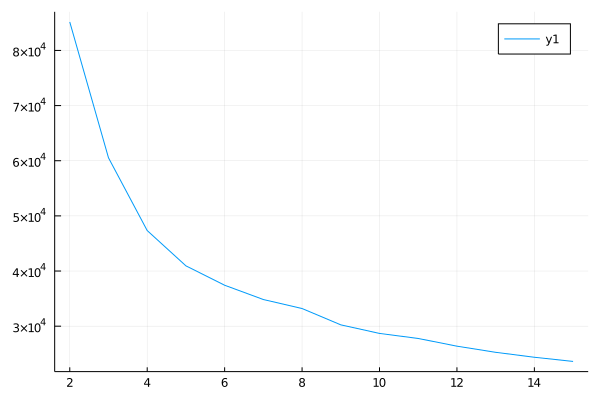

In [86]:
plot(k_range, total_costs)

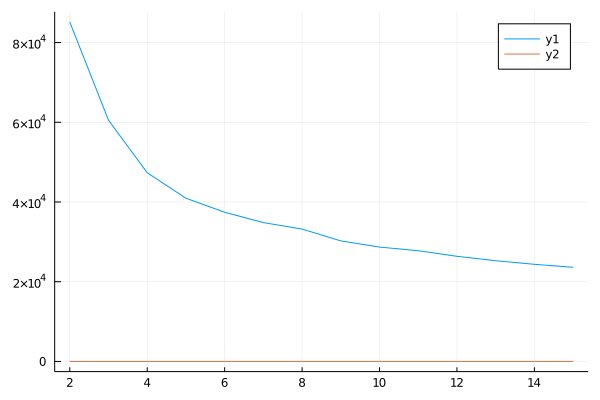

In [87]:
plot!(k_range, sils, side="right")

### Expectation Maximization

In [ ]:
@load KMeans pkg=ParallelKMeans

# Dimensionality Reduction
Apply the dimensionality reduction algorithms to the two datasets and describe what you see.


### PCA

### ICA

### Randomized Projections

### Classical Multidimensional Scaling

# Clustering Pt 2
Reproduce your clustering experiments, but on the data after you've run dimensionality reduction on it. Yes, that’s 16 combinations of datasets, dimensionality reduction, and clustering method. You should look at all of them, but focus on the more interesting findings in your report.

### Kmeans - PCA

### EM - PCA

### Kmeans - ICA

### EM - ICA

### Kmeans - Randomized Projections

### EM - Randomized Projections

### Kmeans - Classical Multidimensional Scaling

### EM - Classical Multidimensional Scaling

# BELOW ONLY FOR 1 DATASET

### Dimensionality Reduction + NN 
Apply the dimensionality reduction algorithms to one of your datasets from assignment #1. (if you've reused the datasets from assignment #1 to do experiments 1-3 above then you've already done this) and rerun your neural network learner on the newly projected data.

### Clustering + NN
Apply the clustering algorithms to the same dataset to which you just applied the dimensionality reduction algorithms (you've probably already done this), treating the clusters as if they were new features. In other words, treat the clustering algorithms as if they were dimensionality reduction algorithms. Again, rerun your neural network learner on the newly projected data.

In [ ]:
###

## Dimensionality Reduction + NN - Apply the dimensionality reduction algorithms to one of your datasets from assignment #1 
#  (if you've reused the datasets from assignment #1 to do experiments 1-3 above then you've already done this) 
#  and rerun your neural network learner on the newly projected data.


## Clustering + NN - Apply the clustering algorithms to the same dataset to which you just applied the dimensionality 
#  reduction algorithms (you've probably already done this), treating the clusters as if they were new features. 
#  In other words, treat the clustering algorithms as if they were dimensionality reduction algorithms. 
#  Again, rerun your neural network learner on the newly projected data.
